**텐서플로를 사용한 사용자 정의 모델과 훈련**

# 설정

먼저 몇 개의 모듈을 임포트한다. 맷플롯립 그림을 저장하는 함수를 준비한다.

In [1]:
# 공통 모듈 임포트
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)
# 깔끔한 그래프 출력을 위해
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)
# 그림을 저장할 위치
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 텐서와 연산

### 텐서

In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]])  # 행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)  # 스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

### 인덱싱

In [7]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### 연산

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### `keras.backend` 사용하기

In [12]:
from tensorflow import keras

K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### 넘파이 변환

In [13]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [14]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [17]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### 타입 변환

In [18]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [19]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [20]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 문자열

In [21]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [22]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [23]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [24]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [25]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### 문자열 배열

In [26]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [27]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [28]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

In [29]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>


### 래그드 텐서

In [30]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [31]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [32]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [33]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [34]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [35]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

### 희소 텐서

In [36]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]], values=[1., 2., 3.], dense_shape=[3, 4])

In [37]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [38]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [39]:
s2 = s * 2.0

In [40]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [41]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [42]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], values=[1., 2.], dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [43]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:GPU:0}} indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node SparseToDense}}]] [Op:SparseToDense]


In [44]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### 집합

In [45]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [46]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [47]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

### 변수

In [48]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [49]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [50]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [51]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [52]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [53]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [54]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]], indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

## 사용자 정의 손실 함수

In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [56]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

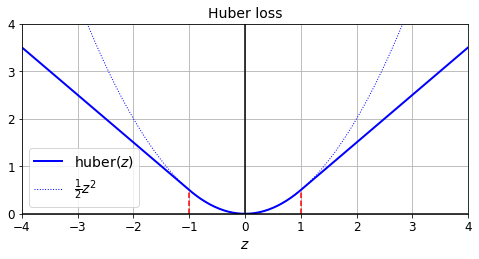

In [57]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [58]:
input_shape = X_train.shape[1:]
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
        keras.layers.Dense(1)
    ]
)

In [59]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [60]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.6187 - mae: 0.9838 - val_loss: 0.2413 - val_mae: 0.5373
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.2103 - mae: 0.5060 - val_loss: 0.1964 - val_mae: 0.4872


## 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [61]:
model.save("my_model_with_a_custom_loss.h5")

In [62]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5", custom_objects={"huber_fn": huber_fn})

In [63]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.1995 - mae: 0.4908 - val_loss: 0.1991 - val_mae: 0.4829
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.1962 - mae: 0.4849 - val_loss: 0.1948 - val_mae: 0.4807


In [64]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    return huber_fn

In [65]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [66]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2176 - mae: 0.4855 - val_loss: 0.2012 - val_mae: 0.4639
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.2129 - mae: 0.4806 - val_loss: 0.2388 - val_mae: 0.4881


In [67]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [68]:
model = keras.models.load_model(
    "my_model_with_a_custom_loss_threshold_2.h5", custom_objects={"huber_fn": create_huber(2.0)}
)

In [69]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2108 - mae: 0.4782 - val_loss: 0.2029 - val_mae: 0.4611
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.2078 - mae: 0.4745 - val_loss: 0.2330 - val_mae: 0.4820


In [70]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [71]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
        keras.layers.Dense(1)
    ]
)

In [72]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [73]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.8568 - mae: 0.9945 - val_loss: 0.6282 - val_mae: 0.7092
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.2699 - mae: 0.5323 - val_loss: 0.5103 - val_mae: 0.6385


In [74]:
model.save("my_model_with_a_custom_loss_class.h5")

In [75]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", custom_objects={"HuberLoss": HuberLoss})

In [76]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.2510 - mae: 0.5147 - val_loss: 0.3930 - val_mae: 0.5683
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.2401 - mae: 0.5048 - val_loss: 0.3066 - val_mae: 0.5304


In [77]:
model.loss.threshold

2.0

## 그외 사용자 정의 함수

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
def my_softplus(z):  # tf.nn.softplus(z) 값을 반환한다
    return tf.math.log(tf.exp(z) + 1.0)


def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)


def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))


def my_positive_weights(weights):  # tf.nn.relu(weights) 값을 반환한다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [80]:
layer = keras.layers.Dense(
    1,
    activation=my_softplus,
    kernel_initializer=my_glorot_initializer,
    kernel_regularizer=my_l1_regularizer,
    kernel_constraint=my_positive_weights
)

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
        keras.layers.Dense(
            1,
            activation=my_softplus,
            kernel_regularizer=my_l1_regularizer,
            kernel_constraint=my_positive_weights,
            kernel_initializer=my_glorot_initializer
        )
    ]
)

In [83]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [84]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 1.7440 - mae: 0.9514 - val_loss: 0.8302 - val_mae: 0.5834
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.6197 - mae: 0.5503 - val_loss: 1.2478 - val_mae: 0.5310


In [85]:
model.save("my_model_with_many_custom_parts.h5")

In [86]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus
    }
)

In [87]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor": self.factor}

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
        keras.layers.Dense(
            1,
            activation=my_softplus,
            kernel_regularizer=MyL1Regularizer(0.01),
            kernel_constraint=my_positive_weights,
            kernel_initializer=my_glorot_initializer)
    ]
)

In [90]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [91]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 1.7867 - mae: 0.9181 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.6862 - mae: 0.5374 - val_loss: inf - val_mae: inf


In [92]:
model.save("my_model_with_many_custom_parts.h5")

In [93]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "MyL1Regularizer": MyL1Regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus,
    }
)

## 사용자 정의 지표

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
        keras.layers.Dense(1)
    ]
)

In [96]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [97]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 1.8591 - huber_fn: 0.8187
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.5678 - huber_fn: 0.2629


**노트**: 손실과 지표에 같은 함수를 사용하면 다른 결과가 나올 수 있다. 이는 일반적으로 부동 소수점 정밀도 오차 때문이다. 수학 식이 동일하더라도 연산은 동일한 순서대로 실행되지 않는다. 이로 인해 작은 차이가 발생한다. 또한 샘플 가중치를 사용하면 정밀도보다 더 큰 오차가 생긴다:

* 에포크에서 손실은 지금까지 본 모든 배치 손실의 평균이다. 각 배치 손실은 가중치가 적용된 샘플 손실의 합을 _배치 크기_ 로 나눈 것이다(샘플 가중치의 합으로 나눈 것이 아니다. 따라서 배치 손실은 손실의 가중 평균이 아니다).
* 에포크에서 지표는 가중치가 적용된 샘플 손실의 합을 지금까지 본 모든 샘플 가중치의 합으로 나눈 것이다. 다른 말로하면 모든 샘플 손실의 가중 평균이다. 따라서 위와 같지 않다.

수학적으로 말하면 손실 = 지표 * 샘플 가중치의 평균(더하기 약간의 부동 소수점 정밀도 오차)이다.

In [98]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [99]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 0.1187 - huber_fn: 0.2408
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.1134 - huber_fn: 0.2300


In [100]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11866960674524307, 0.11950009281960464)

## 사용자 정의 층

In [101]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [102]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

회귀 모델이 예측할 값이 양수이고 스케일이 매우 다른 경우 (예를 들어, 0.001, 10., 10000) 출력층에 지수 함수를 추가하면 유용할 수 있다:

In [103]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model = keras.models.Sequential(
    [keras.layers.Dense(30, activation="relu", input_shape=input_shape), keras.layers.Dense(1), exponential_layer]
)
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6689 - val_loss: 0.4466
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4415 - val_loss: 0.3736
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4147 - val_loss: 0.3547
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4090 - val_loss: 0.3507
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.3790


0.3790166974067688

In [133]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.kernel = None
        self.units = units
        self.activation = keras.activations.get(activation)
        self.bias = None

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units], initializer="glorot_normal"
        )
        self.bias = self.add_weight(name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape)  # 마지막에 호출해야 한다.

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units, "activation": keras.activations.serialize(self.activation)}

In [134]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [135]:
model = keras.models.Sequential([MyDense(30, activation="relu", input_shape=input_shape), MyDense(1)])

In [136]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 1.9209 - val_loss: 0.7735
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.5021


0.5021224617958069

In [137]:
model.save("my_model_with_a_custom_layer.h5")

In [138]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5", custom_objects={"MyDense": MyDense})